# Python for Machine Learning
Softbank Robotics Europe

This code is divided in two parts: 
    * one scikit-learn example from the official documentation
    * the workshop to complete
Your work will be evaluated by lauching the whole script. 

Little reminder: it is good to comment your code, but not too much ;) 
    


## Scikit Learn Package Example

Code taken from:
    http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Automatically created module for IPython interactive environment


/Users/jiabin/anaconda3/envs/FAN/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jiabin/anaconda3/envs/FAN/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jiabin/anaconda3/envs/FAN/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


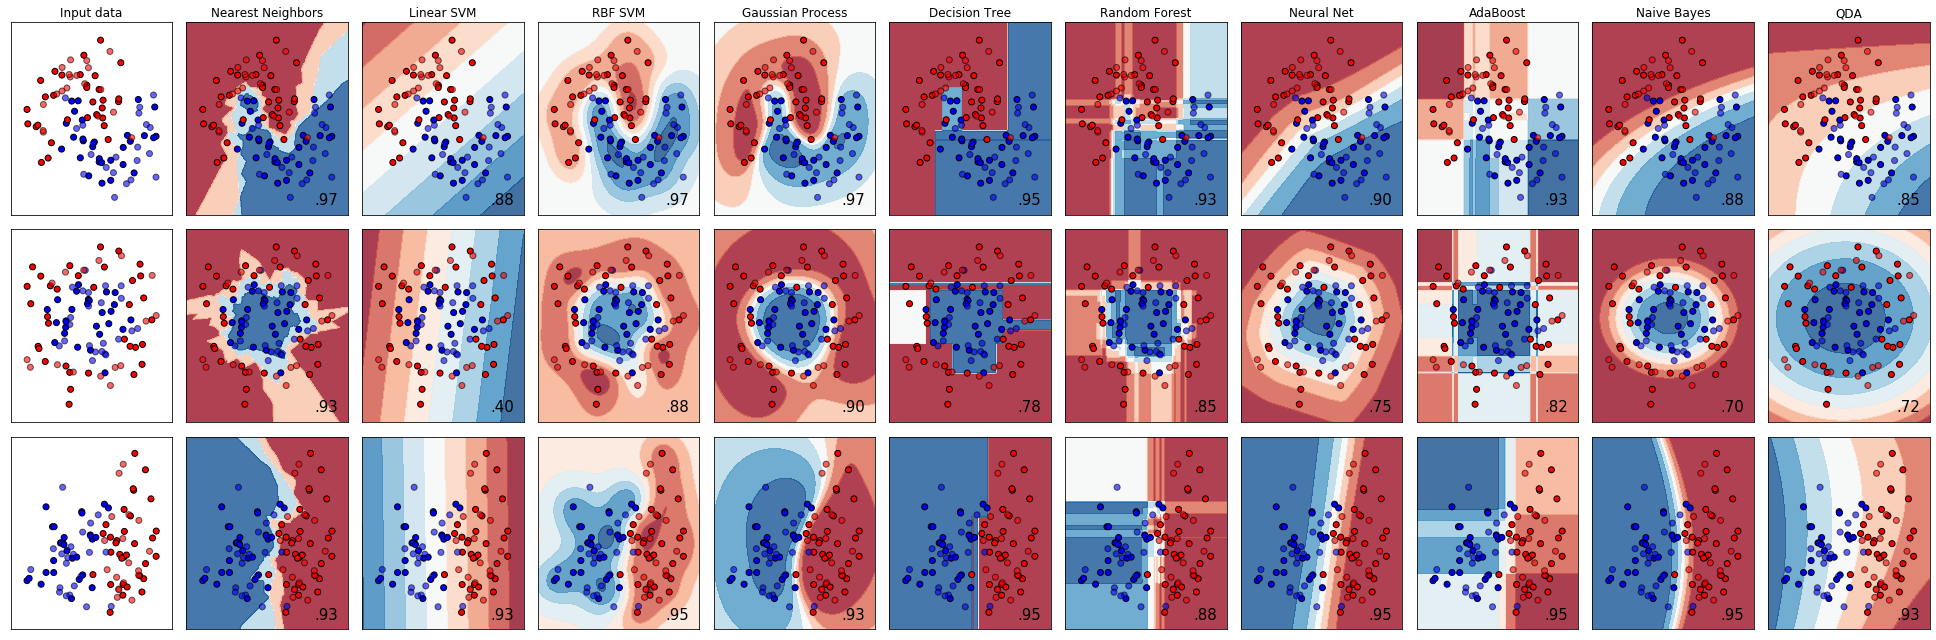

In [1]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, solver='adam'),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Workshop
You will need to "import" the necessary packages to complete your work (in addition to the packages already imported in the example).

### Step 0: import the packages:

In [2]:
# import ...
import pickle

from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d

from sklearn.cluster import KMeans

from sklearn.cluster import SpectralClustering

from sklearn.metrics import accuracy_score

from sklearn.metrics import adjusted_rand_score

### Step 1.1: import data
You will find the pickle file at the address: [data.pickle](https://gitlab.com/susisanchezr/tp_python_sbre/raw/master/data.pickle). This file contains a python dictionary with the following variables:
* X_train
* Y_train
* X_test
* Y_test

You will train the models on the training dataset and the evaluation on the test dataset...

There is one example per line, where X contains the corresponding vectors of the data and Y the labels.

In [3]:
with open('./data.pickle', 'rb') as file:
    data = pickle.load(file)
X_train = data['X_train']
Y_train = data['Y_train']
X_test = data['X_test']
Y_test = data['Y_test']

### Step 1.2: data preprocessing
Use the PCA algorithm from scikit-learn to reduce the X vectors dimension to 3 features.

In [4]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

### Step 2: data visualization 
You can use the visualization package of your preference (matplotlib, pyplot, ....)

with a bit of color...

Text(0.5, 0, 'PCA3')

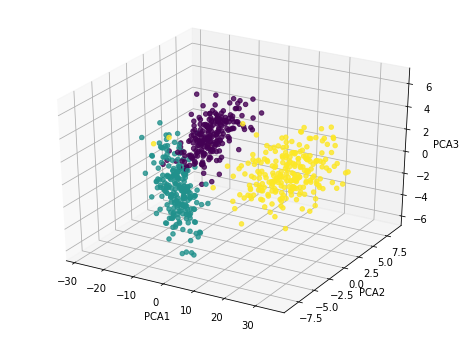

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:,0], X_train_pca[:,1], X_train_pca[:,2], c=Y_train, alpha=0.8)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

### Step 3: unsupervised method
Apply **two** clustering methods of your preference (for example k-means and DBSCAN)

In this section, I cheat a bit when I choose the number of clusters since it's easy to identify by the visualization in previous section. However, in the practice, we may use 'Elbow method' to choose an appropriate number of cluster, that is, excute clustering algorithm for different values of k, calculate the total within-cluster sum of square(wss) for each k, plot the curve of wss according to the number of clusters k. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

In [6]:
# K-means 
kmeans = KMeans(n_clusters=3, n_jobs=1, random_state=42)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [7]:
# Spectral clustering
# We use nearest_neighbors to construct the similarity matrix
# This algorithm doesn’t need to fit training data
spectral =  SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10,
            assign_labels="kmeans", random_state=0)

### Step 4: supervised method
Apply **two** supervised learning methods (one of them using [MLP](http://scikit-learn.org/stable/modules/neural_networks_supervised.html))

In [8]:
# Basic Support Vector Machine as classification model
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
# Simple fully connected neural networks 
# Hidden layer size is set to 32,32,32, and apply softmax function in the output layer
# I add 1e-3 as L2 regularization term and early stopping to prevent overfitting 
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), max_iter=200, alpha=1e-3, batch_size=64,
                    solver='adam', verbose=0, random_state=1, early_stopping=True,
                    n_iter_no_change=10,
                    learning_rate_init=.01)

mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(32, 32, 32), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Step 5: evaluation
For each of the 4 methods used: evaluate the performance of the model on the test dataset with a metric of your preference.

Generally we don't have labels for un-supervised learning. In this case, we have. Hence, I choose the Adjusted Rand Index as a metric which measures the similarity of the two assignments while ignoring permutations

In [10]:
# Kmeans clustering
Y_preds_kmeans = kmeans.predict(X_test)
performance = adjusted_rand_score(Y_test, Y_preds_kmeans)
print('Adjusted Rand index of Kmeans: %.4f' % performance)

Adjusted Rand index of Kmeans: 0.9011


In [11]:
# Spectral clustering
Y_preds_spectral = spectral.fit_predict(X_test)
performance_spec = adjusted_rand_score(Y_test, Y_preds_spectral)
print('Adjusted Rand index of Spectral: %.4f' % performance_spec)

Adjusted Rand index of Spectral: 0.9462


For supervised learning models, I just use accuracy to mesure the classification performance of models

In [12]:
Y_preds_svc = svc.predict(X_test)
acc_svc = accuracy_score(Y_test, Y_preds_svc)
print('Classification accuracy of SVM: %.4f' %acc_svc)

Classification accuracy of SVM: 0.9818


In [13]:
Y_preds_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(Y_test, Y_preds_mlp)
print('Classification accuracy of MLP: %.4f' %acc_mlp)

Classification accuracy of MLP: 0.9758


### Step 6: open question 
By analyzing the characteristics of your PCA model, indicate how many dimensions are necessary to represent 75% of the training information. 

In [14]:
print(pca.explained_variance_ratio_)

[0.81986577 0.08279081 0.01870723]


It shows us that the projected data onto subspace spanned by the eigen vector of the largest eigen value has about 81% variance, so we may use just one dimension to represent 75% of the training information.

### Step 7: optional question
Propose a code using the flask package that serves a web page displaying your name and a link that points at [http://scikit-learn.org](http://scikit-learn.org) and opens a figure of your preference.

### Step 8: submission
Send your python script or your notebook at: [marine.chamoux@softbankrobotics.com](mailto:marine.chamoux@softbankrobotics.com)